In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#authors:  Acarie Jenkens, Carrie Bates, Corey Monsma, Parker Teske, Stargliy Bobby

# File to Load (use the absolute path per class exercise. Used on an Windows maching)
opioids_path = Path("Accidental_Drug_Related_Deaths_2012-2022.csv")

# Read opioid csv file from data.gov then store into Pandas DataFrames
opioids_data_df = pd.read_csv(opioids_path)

opioids_data_df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,5/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,6/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,3/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,1/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [3]:
#To drop the columns (unwanted columns from the main csv file)
opioid_clean_df = opioids_data_df.drop(columns = ['Ethnicity','Xylazine',	'Gabapentin',
                                'Opiate NOS','Heroin/Morph/Codeine',
                                'Other','InjuryCityGeo','DeathCityGeo','Injury City',	
                                'Benzodiazepine','Methadone','Meth/Amphetamine',	
                                'Amphet','Tramad','Hydromorphone','Morphine (Not Heroin)',
                                'Injury County','Cocaine',	'Fentanyl'	,'Fentanyl Analogue',	
                                'Oxycodone','Oxymorphone','Ethanol','Hydrocodone',
                                'Injury State','Location',	'Location if Other','Cause of Death','Manner of Death',	
                              'Injury Place',	'Description of Injury',	'Death City',	
                              'Death County','Death State','Heroin','Heroin death certificate (DC)',
                               'Other Significant Conditions '
                             	 ])
opioid_clean_df.head()

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
0,5/29/2012,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)"
1,6/27/2012,Date of death,37.0,Male,White,NORWICH,NEW LONDON,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)"
2,3/24/2014,Date of death,28.0,Male,White,HEBRON,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)"
3,12/31/2014,Date of death,26.0,Female,White,BALTIC,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)"
4,1/16/2016,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,NaN,Y,"SHELTON, CT\n(41.316843, -73.092968)"


In [4]:
#check the correct column data type
opioid_clean_df.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Residence City',
       'Residence County', 'Residence State', 'Other Opioid', 'Any Opioid',
       'ResidenceCityGeo'],
      dtype='object')

In [5]:
#drop the duplicates

opioid_clean_df.drop_duplicates(keep=False)
#clean and delete the data with "N"
opioid_clean_df.fillna("N", inplace=True)
# To drop the rows with "N"(Sex, Age, Residence County)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Sex'] == 'N'].index,inplace=True)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Age'] == 'N'].index,inplace=True)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Residence County'] == 'N'].index,inplace=True)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Residence County']=='MIDDLESEZ'].index,inplace=True)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Residence County']=='NEWLONDON'].index,inplace=True)
opioid_clean_df.drop(opioid_clean_df[opioid_clean_df['Residence County']=='PLYMOUTH'].index,inplace=True)
#To change the date to pd.to_datetime
opioid_clean_df['Date']=pd.to_datetime(opioid_clean_df['Date'])
opioid_clean_df.head()

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
0,2012-05-29,Date of death,37.0,Male,Black,STAMFORD,FAIRFIELD,N,N,N,"STAMFORD, CT\n(41.051924, -73.539475)"
1,2012-06-27,Date of death,37.0,Male,White,NORWICH,NEW LONDON,N,N,N,"NORWICH, CT\n(41.524304, -72.075821)"
4,2016-01-16,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,N,Y,"SHELTON, CT\n(41.316843, -73.092968)"
5,2017-06-13,Date reported,57.0,Male,White,BLANDFORD,HAMPDEN,MA,N,N,N
6,2015-10-20,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,N,Y,"DANBURY, CT\n(41.393666, -73.451539)"


In [6]:
#To pull the data for the state connecticut
opioid_connecticut_df = opioid_clean_df[opioid_clean_df['Residence State']=='CT']
opioid_connecticut_df.head()

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
4,2016-01-16,Date of death,41.0,Male,White,SHELTON,FAIRFIELD,CT,N,Y,"SHELTON, CT\n(41.316843, -73.092968)"
6,2015-10-20,Date reported,26.0,Male,White,DANBURY,FAIRFIELD,CT,N,Y,"DANBURY, CT\n(41.393666, -73.451539)"
7,2017-02-02,Date reported,64.0,Male,White,MILFORD,NEW HAVEN,CT,N,N,"MILFORD, CT\n(41.224276, -73.057564)"
10,2017-01-14,Date reported,54.0,Male,White,MERIDEN,NEW HAVEN,CT,N,N,"MERIDEN, CT\n(41.537589, -72.8011)"
12,2015-11-10,Date reported,64.0,Male,White,IVORYTON,MIDDLESEX,CT,N,Y,"IVORYTON, CT\n(41.348301, -72.439697)"


In [7]:
#To find the female , male death count, groupby 'Residence city'
#put female, male the index first
grouby_Residencecity = opioid_connecticut_df.groupby('Residence City')
grouby_Residencecity.first()


,Date,Date Type,Age,Sex,Race,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
Residence City,,,,,,,,,,
AMSTON,2015-04-17,Date reported,32.0,Male,White,TOLLAND,CT,N,Y,"AMSTON, CT\n(41.625301, -72.343597)"
ANDOVER,2018-10-08,Date of death,42.0,Male,White,TOLLAND,CT,N,Y,"ANDOVER, CT\n(41.728789, -72.370309)"
ANSONIA,2016-12-21,Date of death,49.0,Male,White,NEW HAVEN,CT,N,Y,"ANSONIA, CT\n(41.34198, -73.078296)"
ASHFORD,2017-08-08,Date reported,29.0,Female,White,WINDHAM,CT,N,N,"ASHFORD, CT\n(41.871915, -72.124128)"
AVON,2017-08-26,Date reported,36.0,Male,White,HARTFORD,CT,N,N,"AVON, CT\n(41.809641, -72.830547)"
...,...,...,...,...,...,...,...,...,...,...
WINSTED,2019-12-27,Date of death,51.0,Male,White,LITCHFIELD,CT,N,Y,"WINSTED, CT\n(41.925393, -73.068845)"
WOLCOTT,2019-08-17,Date of death,24.0,Male,White,NEW HAVEN,CT,N,Y,"WOLCOTT, CT\n(41.601588, -72.986414)"
WOODBRIDGE,2016-02-06,Date of death,27.0,Male,White,NEW HAVEN,CT,N,Y,"WOODBRIDGE, CT\n(41.352933, -73.014356)"


In [8]:
#Total count data for male and female in each city in connecticut from 2015 to 2022
total_count_sex = grouby_Residencecity['Sex'].value_counts()
total_count_sex

Residence City  Sex   
AMSTON          Male       3
ANDOVER         Female     2
                Male       1
ANSONIA         Male      56
                Female    19
                          ..
WOLCOTT         Female    10
WOODBRIDGE      Male       9
WOODBURY        Male       9
WOODSTOCK       Male       9
                Female     2
Name: count, Length: 429, dtype: int64

In [9]:
##To find the female , male death count, first do the groupby 'Residence County'
#The index is Residence County
grouby_Residencecounty = opioid_connecticut_df.groupby('Residence County')
grouby_Residencecounty.first()


,Date,Date Type,Age,Sex,Race,Residence City,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
Residence County,,,,,,,,,,
FAIRFIELD,2016-01-16,Date of death,41.0,Male,White,SHELTON,CT,N,Y,"SHELTON, CT\n(41.316843, -73.092968)"
HARTFORD,2015-09-18,Date reported,43.0,Male,White,ENFIELD,CT,N,Y,"ENFIELD, CT\n(41.976501, -72.591985)"
LITCHFIELD,2015-09-15,Date reported,27.0,Male,White,CANAAN,CT,N,Y,"CANAAN, CT\n(41.963458, -73.334414)"
MIDDLESEX,2015-11-10,Date reported,64.0,Male,White,IVORYTON,CT,N,Y,"IVORYTON, CT\n(41.348301, -72.439697)"
NEW HAVEN,2017-02-02,Date reported,64.0,Male,White,MILFORD,CT,N,N,"MILFORD, CT\n(41.224276, -73.057564)"
NEW LONDON,2016-01-31,Date of death,54.0,Female,White,GRISWOLD,CT,N,Y,"GRISWOLD, CT\n(41.614599, -71.960584)"
TOLLAND,2015-04-12,Date reported,51.0,Female,White,WILLINGTON,CT,N,Y,"WILLINGTON, CT\n(41.87481, -72.262753)"
WINDHAM,2020-10-08,Date of death,42.0,Male,White,BROOKLYN,CT,N,Y,"BROOKLYN, CT\n(41.788252, -71.949628)"


In [10]:
#Total count death from 2015 to 2022 by county
total_count_county = grouby_Residencecounty['Sex'].value_counts()
total_count_county

Residence County  Sex   
FAIRFIELD         Male       999
                  Female     366
HARTFORD          Male      1776
                  Female     572
LITCHFIELD        Male       343
                  Female     125
MIDDLESEX         Male       270
                  Female      81
NEW HAVEN         Male      1901
                  Female     627
NEW LONDON        Male       550
                  Female     222
TOLLAND           Male       180
                  Female      67
WINDHAM           Male       206
                  Female     100
Name: count, dtype: int64

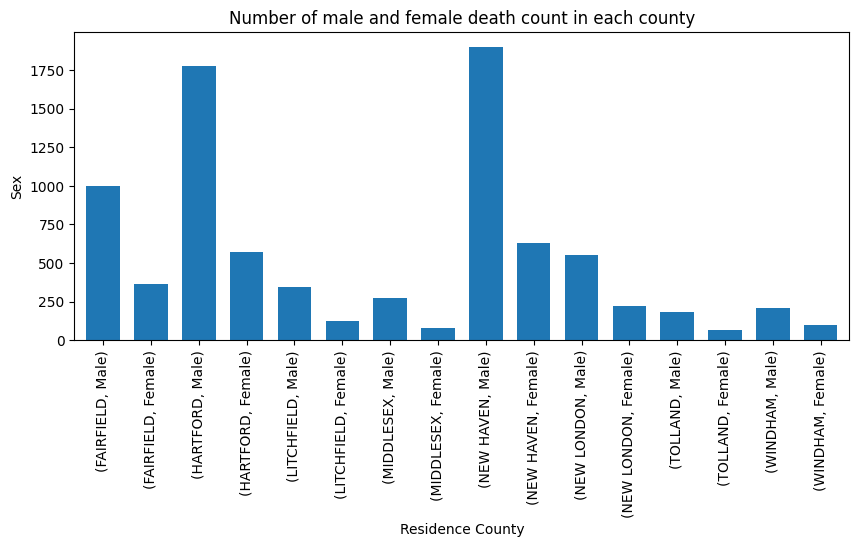

In [24]:
#bar chart for males and female death count in each county 2015-2022
bar_plot =total_count_county.plot(kind='bar', width=0.7, figsize=(10,4), 
                           align='center', xlabel='Residence County', 
                           ylabel='Sex', title='Number of male and female death count in each county')

plt.show()

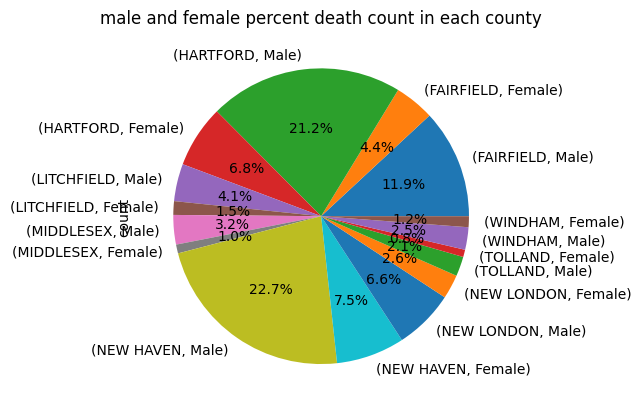

In [23]:
#percent death count of male and female in each county 2015-2022
total_count_county.plot(kind='pie', autopct='%1.1f%%',radius = 1, title='male and female percent death count in each county')
plt.show()

In [13]:
#To pull the data for Date = '2022-01-01'
opioid_connecticut1_df = opioid_connecticut_df[opioid_connecticut_df['Date']>='2022-01-01']
opioid_connecticut1_df.head()

,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo
756,2022-08-07,Date of death,48.0,Female,White,BRISTOL,HARTFORD,CT,N,Y,"BRISTOL, CT\n(41.675740000000076, -72.94660999..."
1037,2022-09-18,Date of death,41.0,Male,White,NAUGATUCK,NEW HAVEN,CT,N,Y,"NAUGATUCK, CT\n(41.49069000000003, -73.0552899..."
1577,2022-12-09,Date of death,47.0,Male,Black or African American,WATERBURY,NEW HAVEN,CT,N,Y,"WATERBURY, CT\n(41.55490000000003, -73.0464699..."
1893,2022-11-11,Date of death,36.0,Male,White,HARTFORD,HARTFORD,CT,N,Y,"HARTFORD, CT\n(41.76376000000005, -72.67397999..."
3955,2022-03-24,Date of death,28.0,Male,White,ESSEX,MIDDLESEX,CT,N,N,"ESSEX, CT\n(41.35324000000003, -72.39086999999..."


In [14]:
#get the specific year 2022
opioid_connecticut1_df['year'] = opioid_connecticut1_df['Date'].dt.year
opioid_connecticut1_df.head()


C:\Users\starb\AppData\Local\Temp\ipykernel_17824\2624138011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_connecticut1_df['year'] = opioid_connecticut1_df['Date'].dt.year


,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo,year
756,2022-08-07,Date of death,48.0,Female,White,BRISTOL,HARTFORD,CT,N,Y,"BRISTOL, CT\n(41.675740000000076, -72.94660999...",2022
1037,2022-09-18,Date of death,41.0,Male,White,NAUGATUCK,NEW HAVEN,CT,N,Y,"NAUGATUCK, CT\n(41.49069000000003, -73.0552899...",2022
1577,2022-12-09,Date of death,47.0,Male,Black or African American,WATERBURY,NEW HAVEN,CT,N,Y,"WATERBURY, CT\n(41.55490000000003, -73.0464699...",2022
1893,2022-11-11,Date of death,36.0,Male,White,HARTFORD,HARTFORD,CT,N,Y,"HARTFORD, CT\n(41.76376000000005, -72.67397999...",2022
3955,2022-03-24,Date of death,28.0,Male,White,ESSEX,MIDDLESEX,CT,N,N,"ESSEX, CT\n(41.35324000000003, -72.39086999999...",2022


In [15]:
#groupby Residence County by Sex in 2022
grouby_2022 = opioid_connecticut1_df.groupby('Residence County')
grouby_2022.first()

,Date,Date Type,Age,Sex,Race,Residence City,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo,year
Residence County,,,,,,,,,,,
FAIRFIELD,2022-07-26,Date of death,58.0,Female,Black or African American,BRIDGEPORT,CT,N,Y,"BRIDGEPORT, CT\n(41.18213000000003, -73.190639...",2022
HARTFORD,2022-08-07,Date of death,48.0,Female,White,BRISTOL,CT,N,Y,"BRISTOL, CT\n(41.675740000000076, -72.94660999...",2022
LITCHFIELD,2022-07-27,Date of death,57.0,Male,White,TORRINGTON,CT,N,Y,"TORRINGTON, CT\n(41.80137000000008, -73.086199...",2022
MIDDLESEX,2022-03-24,Date of death,28.0,Male,White,ESSEX,CT,N,N,"ESSEX, CT\n(41.35324000000003, -72.39086999999...",2022
NEW HAVEN,2022-09-18,Date of death,41.0,Male,White,NAUGATUCK,CT,N,Y,"NAUGATUCK, CT\n(41.49069000000003, -73.0552899...",2022
NEW LONDON,2022-09-12,Date of death,22.0,Male,White,GROTON,CT,N,Y,"GROTON, CT\n(41.35486000000003, -72.0714499999...",2022
TOLLAND,2022-05-04,Date of death,41.0,Male,White,VERNON,CT,N,Y,"VERNON, CT\n(41.867530000000045, -72.448059999...",2022
WINDHAM,2022-06-18,Date of death,65.0,Male,White,WILLIMANTIC,CT,N,Y,"WILLIMANTIC, CT\n(41.71096000000006, -72.20528...",2022


In [16]:
#death count for males and females in each county in 2022
total_2022_county = grouby_2022['Sex'].value_counts()
total_2022_county

Residence County  Sex   
FAIRFIELD         Male      153
                  Female     68
HARTFORD          Male      235
                  Female     94
LITCHFIELD        Male       46
                  Female     15
MIDDLESEX         Male       26
                  Female     10
NEW HAVEN         Male      346
                  Female    107
NEW LONDON        Male       75
                  Female     41
TOLLAND           Male       25
                  Female      4
WINDHAM           Male       24
                  Female     13
Name: count, dtype: int64

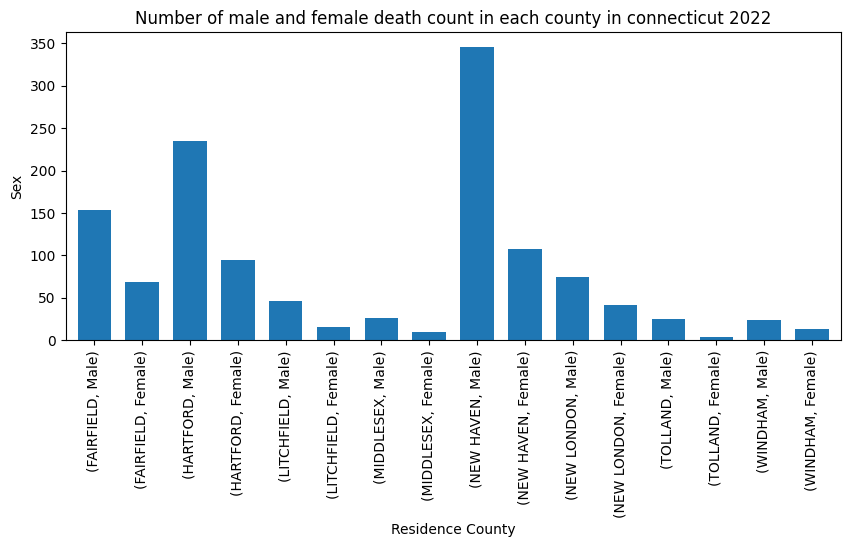

In [22]:
#barchart for male and female death count in each county in connecticut 2022
bar_plot =total_2022_county.plot(kind='bar', width=0.7, figsize=(10,4), 
                           align='center', xlabel='Residence County', 
                           ylabel='Sex', title='Number of male and female death count in each county in connecticut 2022')

plt.show()


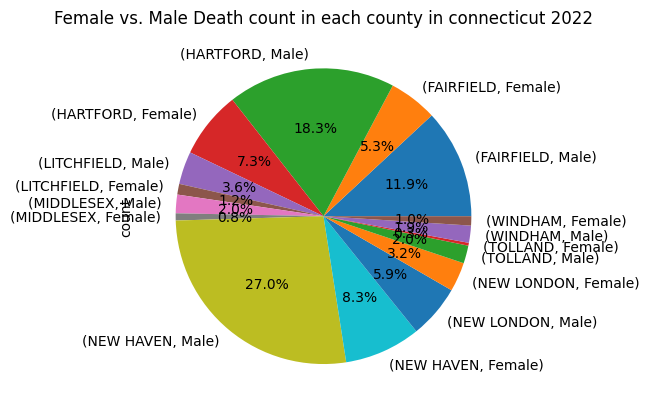

In [18]:
#pie chart for Female vs. Male Death count in each county in connecticut 2022
total_2022_county.plot(kind='pie', autopct='%1.1f%%',radius = 1, title='Female vs. Male Death count in each county in connecticut 2022')
plt.savefig('Total Death Count in each county connecticut 2022.png')
plt.savefig('Total Death Count in each county in connecticut 2022.png')
plt.show()

In [19]:
#groupby sex for total count
groupby_sex = opioid_connecticut1_df.groupby('Sex')
groupby_sex.first()

,Date,Date Type,Age,Race,Residence City,Residence County,Residence State,Other Opioid,Any Opioid,ResidenceCityGeo,year
Sex,,,,,,,,,,,
Female,2022-08-07,Date of death,48.0,White,BRISTOL,HARTFORD,CT,N,Y,"BRISTOL, CT\n(41.675740000000076, -72.94660999...",2022
Male,2022-09-18,Date of death,41.0,White,NAUGATUCK,NEW HAVEN,CT,N,Y,"NAUGATUCK, CT\n(41.49069000000003, -73.0552899...",2022


In [20]:
#Total death count in connecticut in 2022
total_female_male = groupby_sex['Sex'].value_counts()
total_female_male

Sex
Female    352
Male      930
Name: count, dtype: int64

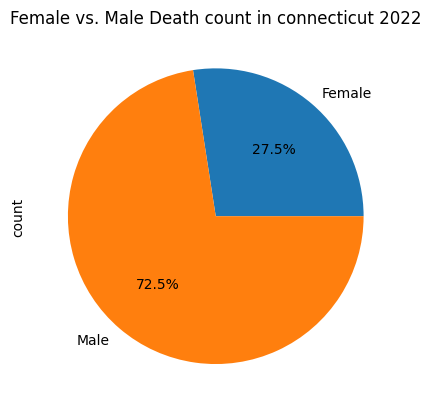

In [21]:
#Total percent for death coun males and females in connecticut 2022
total_female_male.plot(kind='pie', autopct='%1.1f%%', title='Female vs. Male Death count in connecticut 2022')
plt.savefig('Total Death Count in connecticut 2022.png')
plt.show()